In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0059.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0024.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0232.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0286.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0233.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0123.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0150.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-piTr_0009.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0078.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0283.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0084.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pit

In [2]:
base_path = "/kaggle/input/brain-tumour-classification/BrainTumor_1/Train"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [3]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df.head()

,image_path,label
0,/kaggle/input/brain-tumour-classification/Brai...,glioma
1,/kaggle/input/brain-tumour-classification/Brai...,glioma
2,/kaggle/input/brain-tumour-classification/Brai...,glioma
3,/kaggle/input/brain-tumour-classification/Brai...,glioma
4,/kaggle/input/brain-tumour-classification/Brai...,glioma


In [5]:
df.tail()

,image_path,label
22843,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22844,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22845,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22846,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22847,/kaggle/input/brain-tumour-classification/Brai...,pituitary


In [6]:
df.shape

(22848, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [9]:
df['label'].value_counts()

label
notumor       6380
pituitary     5828
meningioma    5356
glioma        5284
Name: count, dtype: int64

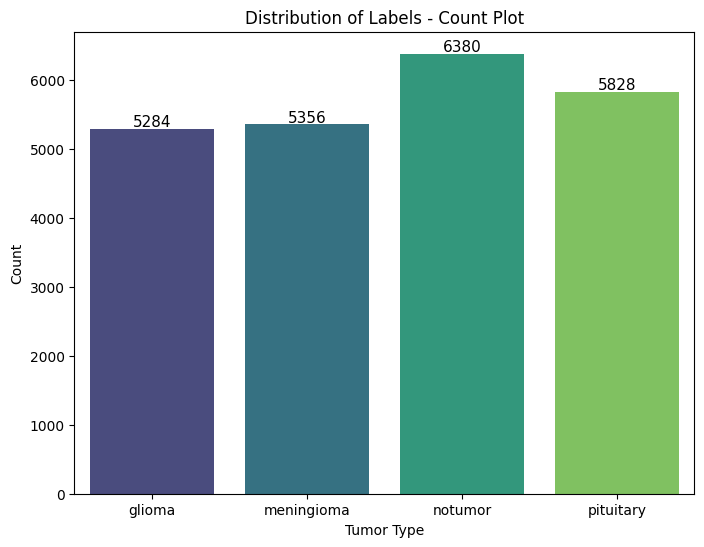

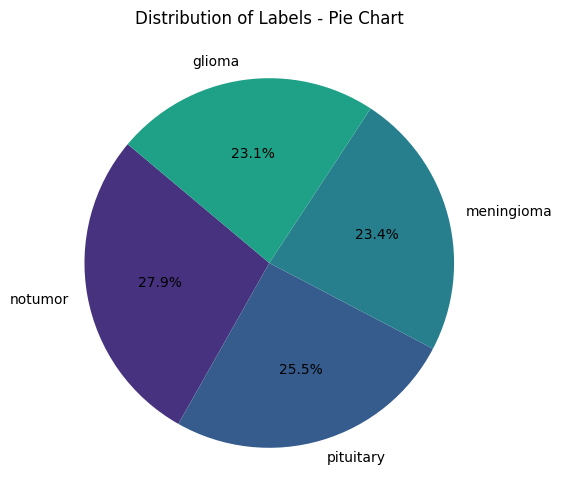

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

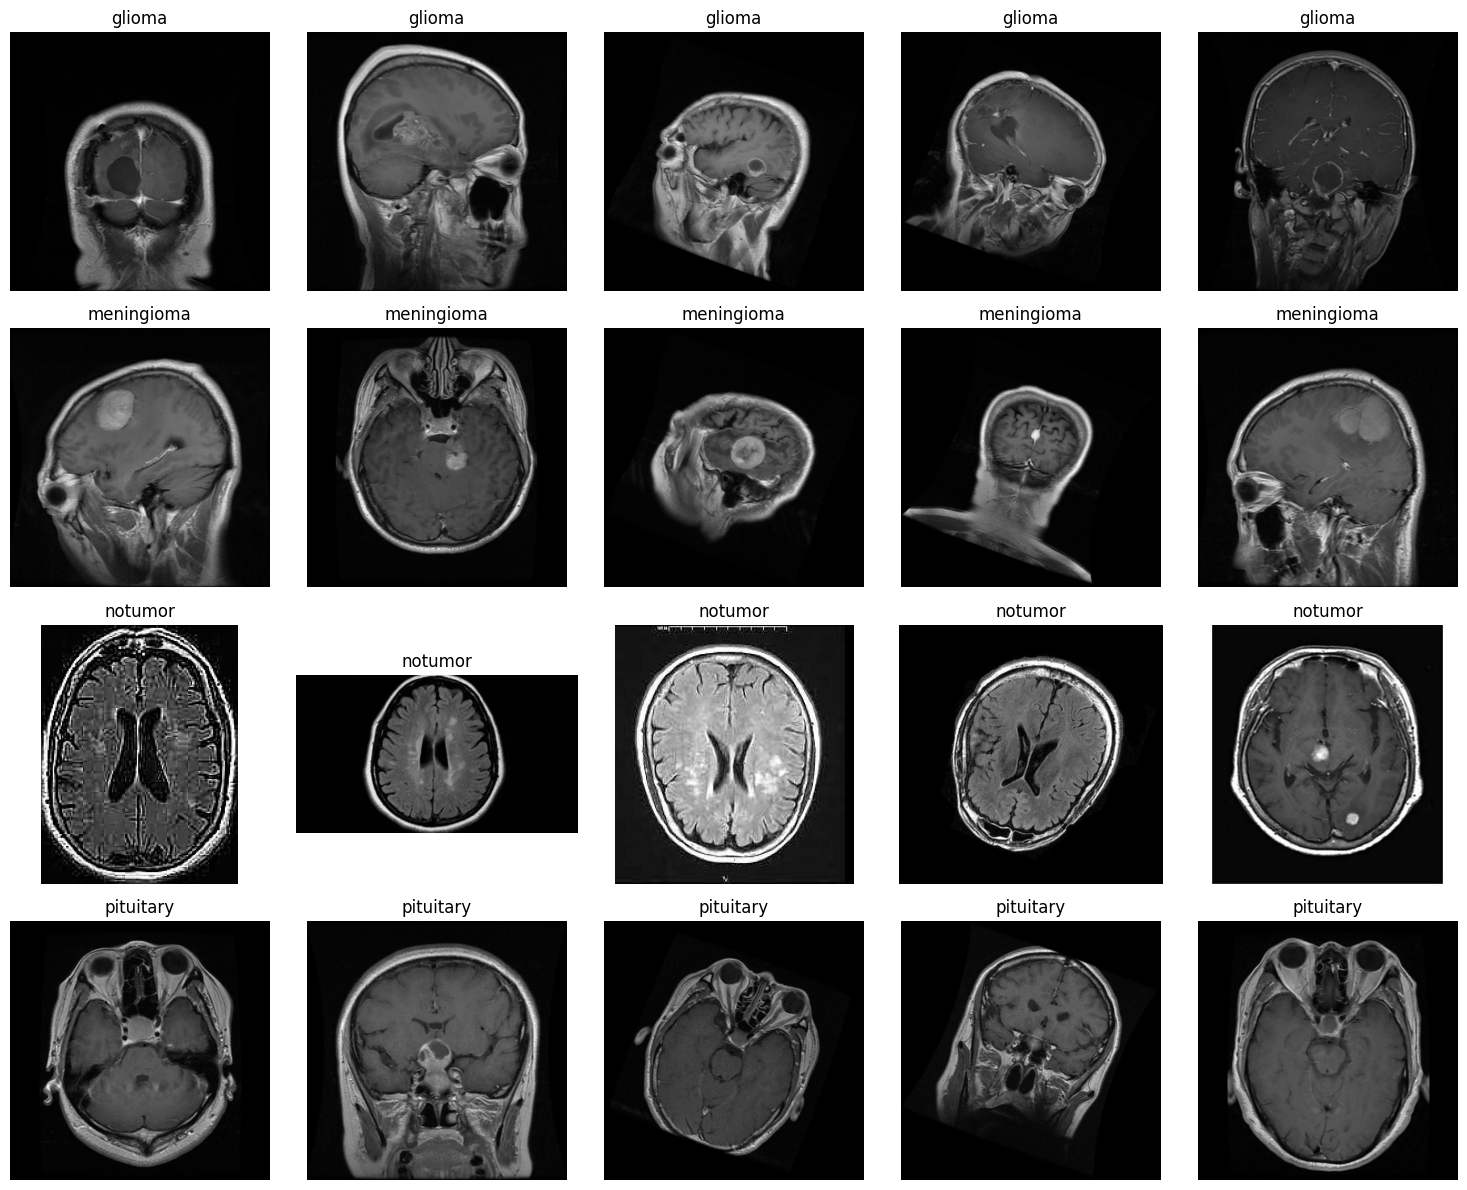

In [11]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [13]:
df = df[['image_path', 'category_encoded']]

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [16]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [17]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    6380
1    6380
2    6380
3    6380
Name: count, dtype: int64


In [18]:
df_resampled

,image_path,category_encoded
0,/kaggle/input/brain-tumour-classification/Brai...,0
1,/kaggle/input/brain-tumour-classification/Brai...,0
2,/kaggle/input/brain-tumour-classification/Brai...,0
3,/kaggle/input/brain-tumour-classification/Brai...,0
4,/kaggle/input/brain-tumour-classification/Brai...,0
...,...,...
25515,/kaggle/input/brain-tumour-classification/Brai...,3
25516,/kaggle/input/brain-tumour-classification/Brai...,3
25517,/kaggle/input/brain-tumour-classification/Brai...,3
25518,/kaggle/input/brain-tumour-classification/Brai...,3


In [19]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [20]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [21]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, 
                                     GaussianNoise, Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_vgg16_model(input_shape):
   
    inputs = Input(shape=input_shape)
    
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512  
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732449117.541733     152 service.cc:145] XLA service 0x7ba5f8009590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732449117.541785     152 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732449117.541789     152 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732449126.316962     187 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1284 bytes spill stores, 1272 bytes spill loads



   1/1276 ━━━━━━━━━━━━━━━━━━━━ 8:52:58 25s/step - accuracy: 0.3125 - loss: 1.5851

I0000 00:00:1732449138.932198     152 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7640 - loss: 0.6239

I0000 00:00:1732449333.003670     246 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 1280 bytes spill stores, 1268 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 226s 158ms/step - accuracy: 0.7641 - loss: 0.6238 - val_accuracy: 0.8241 - val_loss: 0.5455
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 137s 107ms/step - accuracy: 0.8798 - loss: 0.3279 - val_accuracy: 0.8507 - val_loss: 0.4273
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 135s 106ms/step - accuracy: 0.9115 - loss: 0.2372 - val_accuracy: 0.9130 - val_loss: 0.2440
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 136s 106ms/step - accuracy: 0.9282 - loss: 0.1988 - val_accuracy: 0.9287 - val_loss: 0.2061
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 136s 107ms/step - accuracy: 0.9421 - loss: 0.1623 - val_accuracy: 0.8868 - val_loss: 0.3237


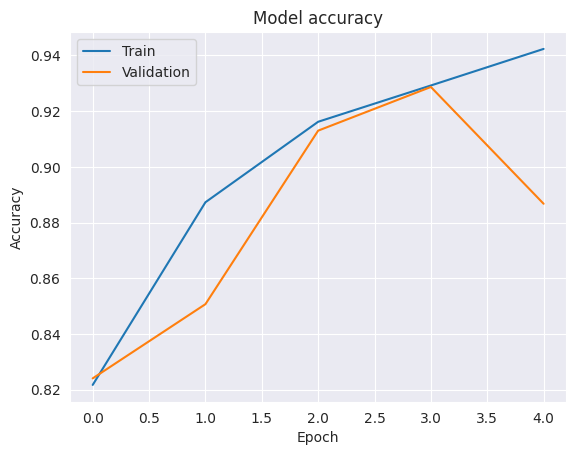

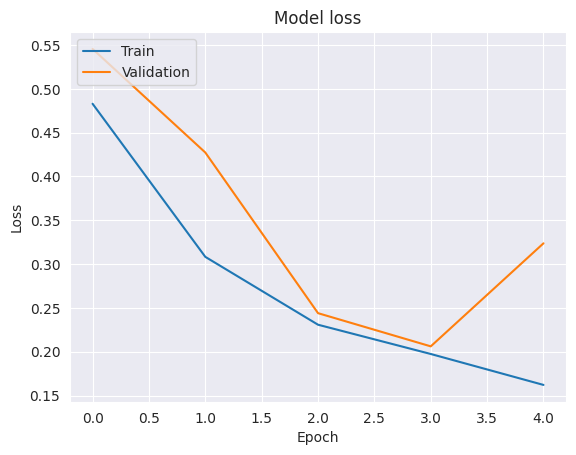

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step


In [30]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       638
           1       0.91      0.87      0.89       638
           2       0.99      0.96      0.97       638
           3       0.90      0.98      0.94       638

    accuracy                           0.93      2552
   macro avg       0.93      0.93      0.93      2552
weighted avg       0.93      0.93      0.93      2552



In [31]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

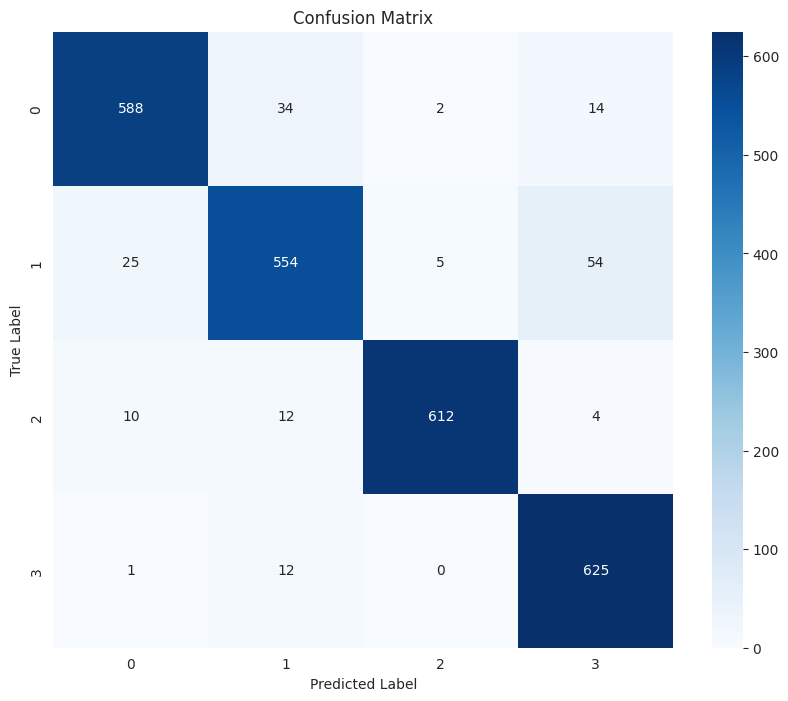

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_vgg19_model(input_shape):
  
    inputs = Input(shape=input_shape)
    
    base_model = VGG19(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512   
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg19_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 169s 126ms/step - accuracy: 0.7368 - loss: 0.6854 - val_accuracy: 0.5482 - val_loss: 1.7048
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 158s 124ms/step - accuracy: 0.8700 - loss: 0.3505 - val_accuracy: 0.7187 - val_loss: 1.0202
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 159s 124ms/step - accuracy: 0.9009 - loss: 0.2684 - val_accuracy: 0.7661 - val_loss: 0.7381
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 159s 124ms/step - accuracy: 0.9215 - loss: 0.2249 - val_accuracy: 0.3389 - val_loss: 4.0842
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 158s 123ms/step - accuracy: 0.9292 - loss: 0.2005 - val_accuracy: 0.8096 - val_loss: 0.5702


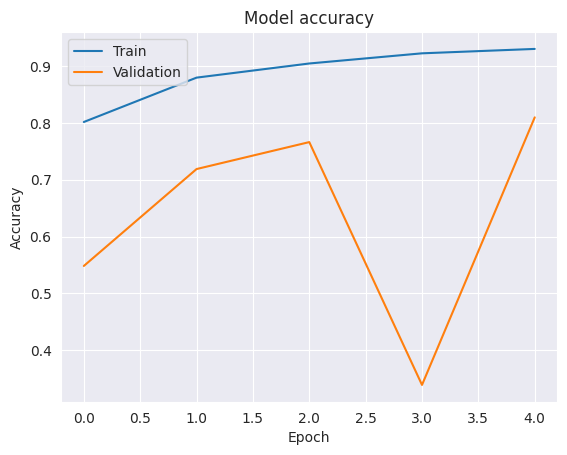

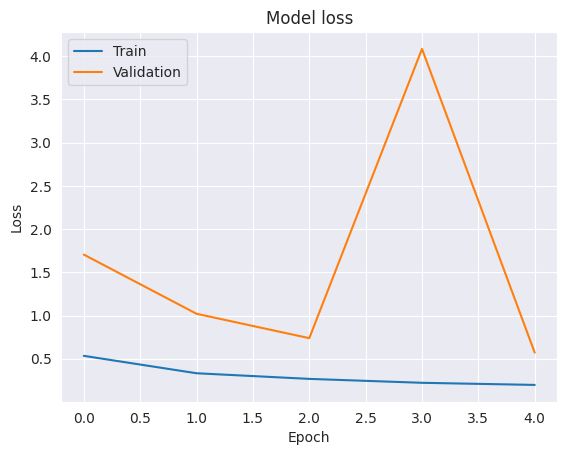

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step


In [40]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.41      0.58       638
           1       0.35      1.00      0.52       638
           2       0.99      0.70      0.82       638
           3       1.00      0.05      0.09       638

    accuracy                           0.54      2552
   macro avg       0.83      0.54      0.50      2552
weighted avg       0.83      0.54      0.50      2552



In [41]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

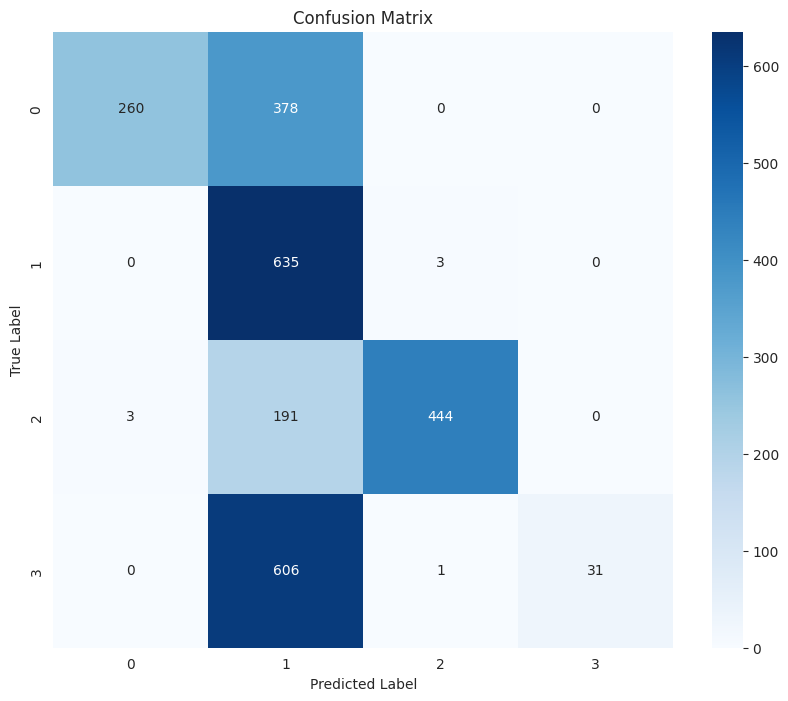

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)
  
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732453257.309033     515 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8492 - loss: 0.4228

I0000 00:00:1732453359.739603     567 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



1276/1276 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.8493 - loss: 0.4227 - val_accuracy: 0.8899 - val_loss: 0.3266
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - accuracy: 0.9400 - loss: 0.1707 - val_accuracy: 0.9506 - val_loss: 0.1401
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9624 - loss: 0.1101 - val_accuracy: 0.9671 - val_loss: 0.1019
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.9759 - loss: 0.0696 - val_accuracy: 0.9542 - val_loss: 0.1438
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 84s 66ms/step - accuracy: 0.9794 - loss: 0.0602 - val_accuracy: 0.9451 - val_loss: 0.1753


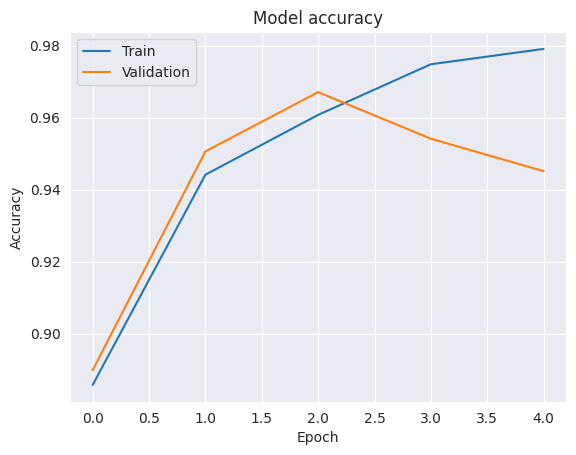

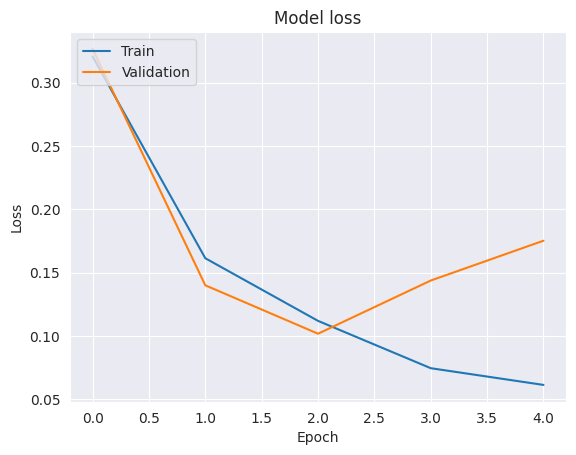

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step


In [48]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       638
           1       0.92      0.95      0.93       638
           2       1.00      0.97      0.98       638
           3       0.95      0.99      0.97       638

    accuracy                           0.96      2552
   macro avg       0.96      0.96      0.96      2552
weighted avg       0.96      0.96      0.96      2552



In [49]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

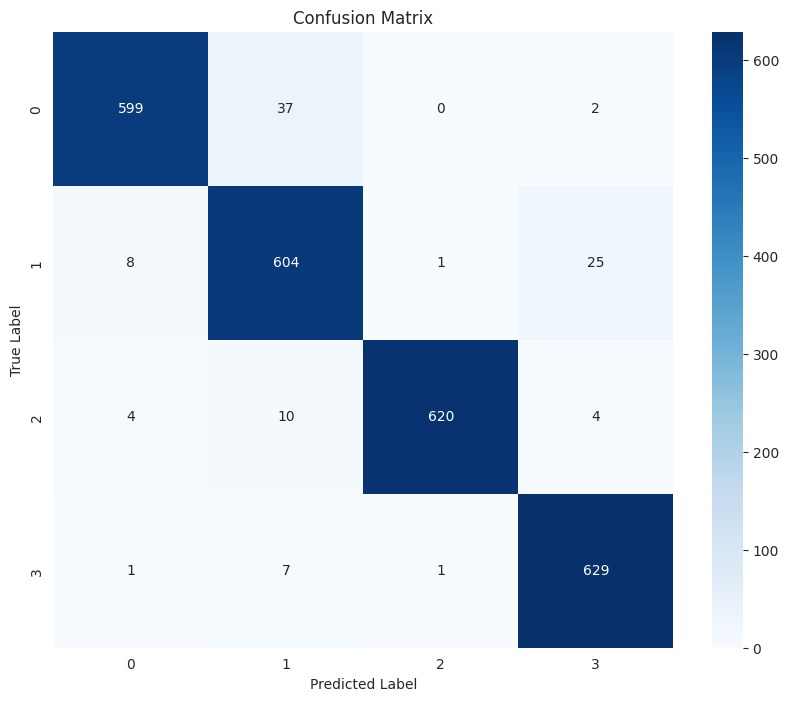

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()